# Environment setup

In [17]:
# pipeline.ipynb  — master orchestrator
# -------------------------------------------------------------
# Ensure the project root is on the Python path so we can import
# our local modules (feature_engineering.py, pca_baseline.py, clustering.py)
import sys, pathlib, os
from IPython.display import Image, display

# In Jupyter, just use the directory where the notebook lives
PROJECT_ROOT = pathlib.Path(os.getcwd()).resolve()
sys.path.append(str(PROJECT_ROOT))

DATA_DIR = PROJECT_ROOT / "data"
DATA_DIR.mkdir(exist_ok=True)

print("Project root:", PROJECT_ROOT)
print("Data dir:", DATA_DIR)


Project root: /Users/zacharycoates/Desktop/Northeastern/SM25/DM/final project
Data dir: /Users/zacharycoates/Desktop/Northeastern/SM25/DM/final project/data


# Run feature engineering

In [18]:
import feature_engineering  # must expose main()

csv_path = DATA_DIR / "sp500_features.csv"

if not csv_path.exists():
    print("[INFO]   sp500_features.csv not found — running feature engineering …")
    feature_engineering.main()
else:
    print("[SKIP]   Feature engineering already done.")

[SKIP]   Feature engineering already done.


# Run PCA + log‑reg baseline

In [19]:
import pca_baseline  # must expose main()

print("\n[STAGE]  PCA + baseline")
pca_baseline.main()   # prints metrics and writes data/pca_features.csv (csv for simplicity)


[STAGE]  PCA + baseline
Label distribution:
label
1    0.671314
2    0.171465
0    0.157221
Name: proportion, dtype: float64
[INFO] PCA features written to /Users/zacharycoates/Desktop/Northeastern/SM25/DM/final project/data/pca_features.csv
====== Logistic Regression Baseline Metrics: ======
  accuracy: 0.5844
 precision: 0.4980
    recall: 0.5598
        f1: 0.5072
              precision    recall  f1-score   support

        down       0.34      0.58      0.43     16495
     neutral       0.83      0.61      0.70     78482
          up       0.32      0.50      0.39     18204

    accuracy                           0.58    113181
   macro avg       0.50      0.56      0.51    113181
weighted avg       0.68      0.58      0.61    113181



# Run clustering


[STAGE]  Clustering
=== Clustering Summary ===
      k_chosen: 3
    silhouette: 0.2253880204347943
davies_bouldin: 1.295050300526388
[RESULT] Clustering metrics: {'k_chosen': 3, 'silhouette': 0.2253880204347943, 'davies_bouldin': 1.295050300526388}
[PLOT]   elbow_plot → /Users/zacharycoates/Desktop/Northeastern/SM25/DM/final project/figures/kmeans_elbow.png
[PLOT]   scatter_plot → /Users/zacharycoates/Desktop/Northeastern/SM25/DM/final project/figures/pca_clusters.png


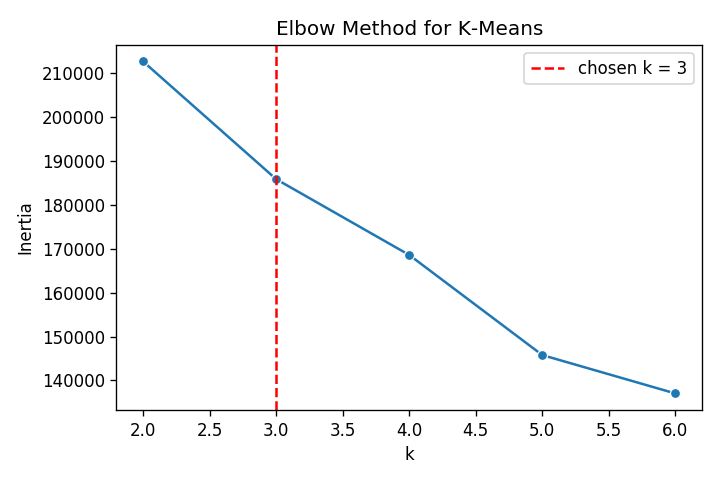

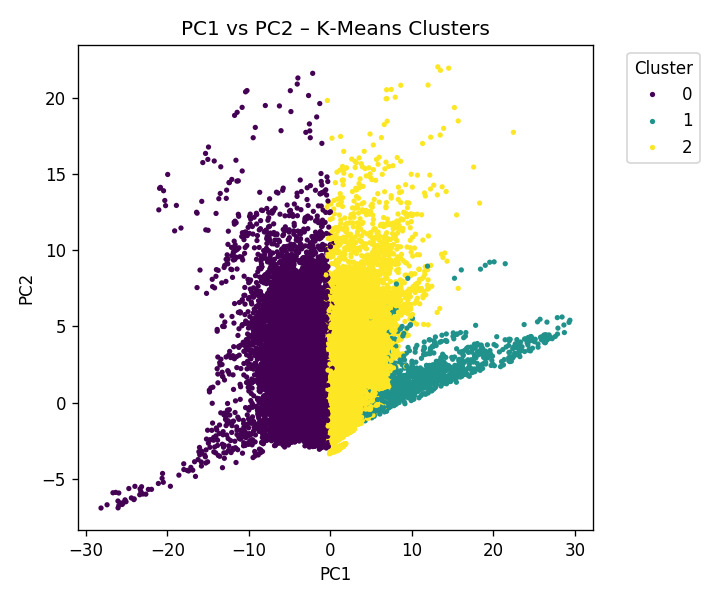

In [20]:
from clustering import run as clustering_run

print("\n[STAGE]  Clustering")
cluster_metrics, plots = clustering_run()

print("[RESULT] Clustering metrics:", cluster_metrics)
for label, path in plots.items():
    print(f"[PLOT]   {label} → {path}")

display(Image(filename=plots["elbow_plot"]))
display(Image(filename=plots["scatter_plot"]))

# Quick sanity check

In [21]:
import pandas as pd

final_path = DATA_DIR / "cluster.csv"
df_final = pd.read_csv(final_path)
print(f"Final dataset shape: {df_final.shape}")
print(df_final.head())

Final dataset shape: (565905, 10)
          0         1         2         3         4         5         6  \
0  1.202033 -1.187627 -0.284097  0.902165  0.033147  0.067358  0.111339   
1  0.296618 -1.469167 -0.373830 -0.226557 -0.380472 -0.187320 -0.197104   
2  1.606354 -1.035918 -0.740277 -0.252394 -0.421966 -1.089645 -0.537903   
3  2.917561  0.435064 -1.515412  1.824493  0.258056 -0.480581  0.500472   
4  0.369805  0.432137 -0.298445  0.881122 -0.005022  0.847724  1.506060   

          7  label  cluster_label  
0 -0.384832      1              2  
1 -0.386238      1              2  
2  0.043907      1              2  
3 -0.348785      2              2  
4 -0.178799      1              2  


# MLP Neural Network Classifier


[STAGE]  MLP Neural Network Classifier
Loading and preparing data...

Dataset Overview:
--------------------------------------------------
Shape: (565905, 10)
Number of features: 9
Number of samples: 565905
Time period coverage: 1131.0 trading days

Class distribution:
  Big negative moves (<-1.5%): 15.7%
  Small/No moves (-1.5% to 1.5%): 67.1%
  Big positive moves (>1.5%): 17.1%

Training set shape: (452724, 8)
Test set shape: (113181, 8)

Creating and training MLP model...

Dataset Overview:
--------------------------------------------------
Shape: (565905, 10)
Number of features: 9
Number of samples: 565905
Time period coverage: 1131.0 trading days

Class distribution:
  Big negative moves (<-1.5%): 15.7%
  Small/No moves (-1.5% to 1.5%): 67.1%
  Big positive moves (>1.5%): 17.1%

Training set shape: (452724, 8)
Test set shape: (113181, 8)

Creating and training MLP model...
Iteration 1, loss = 0.39436406
Validation score: 0.829709
Iteration 1, loss = 0.39436406
Validation score: 0

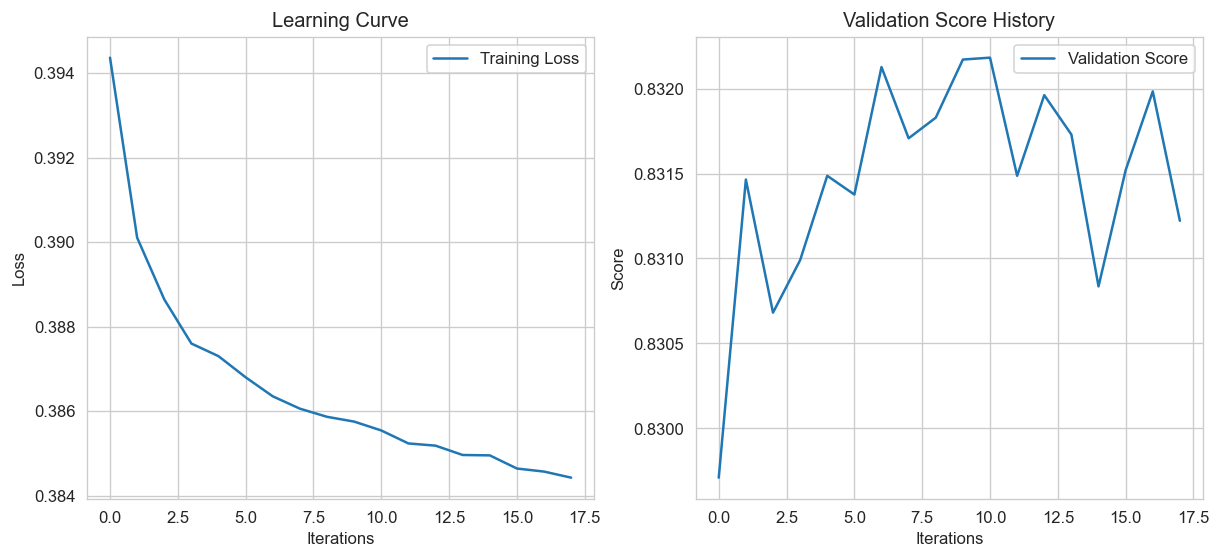

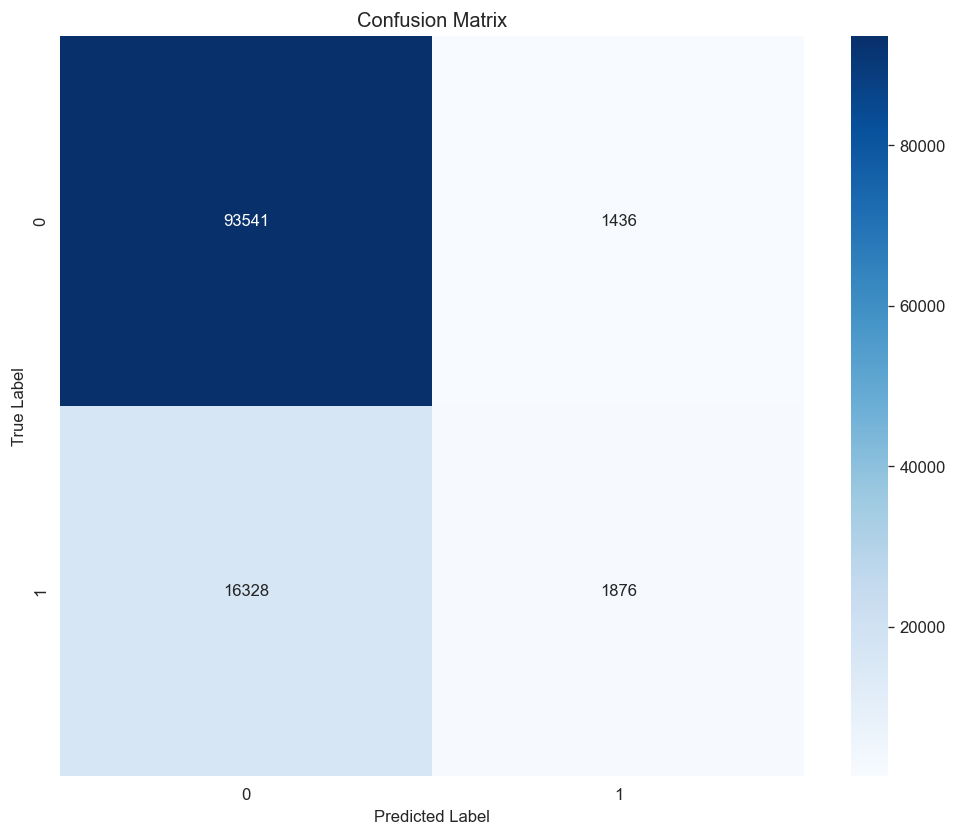

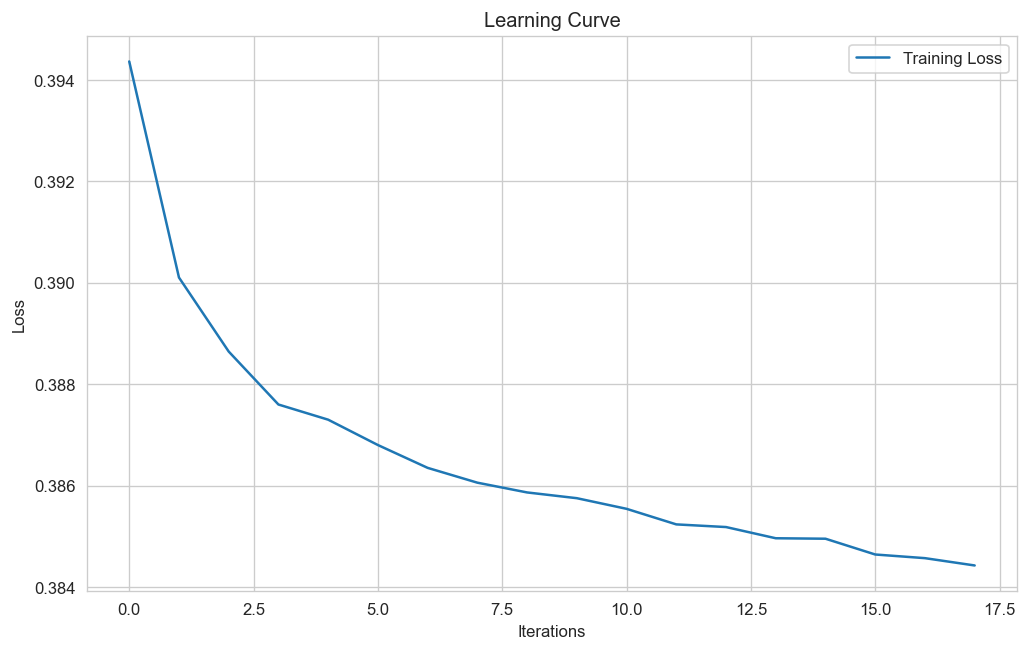

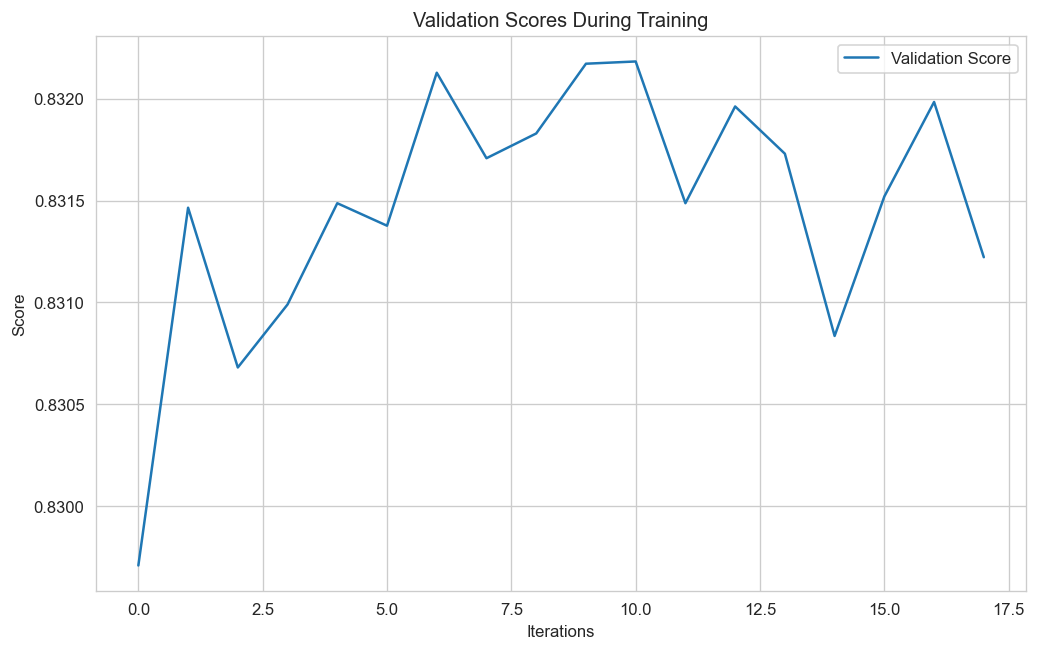

In [1]:
from mlp_classifier import train_and_evaluate
from IPython.display import Image, display

print("\n[STAGE]  MLP Neural Network Classifier")
metrics, report, plot_paths = train_and_evaluate()

print("[RESULT] MLP Performance Metrics:")
for metric, value in metrics.items():
    print(f"         {metric}: {value:.4f}")

print("[RESULT] Classification Report:")
print(f"         Class 0 (No significant increase) - Precision: {report['0']['precision']:.4f}, Recall: {report['0']['recall']:.4f}, F1: {report['0']['f1-score']:.4f}")
print(f"         Class 1 (Significant increase) - Precision: {report['1']['precision']:.4f}, Recall: {report['1']['recall']:.4f}, F1: {report['1']['f1-score']:.4f}")
print(f"         Overall Accuracy: {report['accuracy']:.4f}")

print("\n[PLOTS]  MLP Visualizations:")
for plot_type, path in plot_paths.items():
    print(f"         {plot_type} → {path}")

# Display all plots inline
display(Image(filename=plot_paths["training_history"]))
display(Image(filename=plot_paths["confusion_matrix"]))
display(Image(filename=plot_paths["loss_curve"]))
display(Image(filename=plot_paths["validation_scores"]))

# Pipeline Complete!

All stages have been executed successfully:

1. **Feature Engineering** - Generated comprehensive technical indicators
2. **PCA + Baseline** - Dimensionality reduction and logistic regression baseline  
3. **Clustering** - K-means clustering for market regime identification
4. **MLP Neural Network** - Deep learning classifier for stock movement prediction

All results, metrics, and visualizations are now available in one consolidated pipeline!